# Visualizing internal layers in a simple ConvNet

**Description:** Visualizes the content of the intermediate layers of a convnet <br>
**Dataset:** We use simple circles and triangles from Kaggle <br>


https://github.com/gabrielpierobon/cnnshapes

In [18]:
%matplotlib inline
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # to avoid warning messages

import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import MaxPooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

### Load images and split in train and test

In [2]:
# folder structure 
#Notebook
#    !------ data
#                  !-------------squares
#                  !-------------circles
#                  !-------------triangles
#
data_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

training_set= data_datagen.flow_from_directory(  directory = './data/',
                                                 target_size = (28, 28),
                                                 batch_size = 16,
                                                 subset='training',
                                                 class_mode = 'categorical')

validation_set=data_datagen.flow_from_directory( directory = './data/',
                                                 target_size = (28, 28),
                                                 batch_size = 16,
                                                 subset='validation',
                                                 class_mode = 'categorical')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


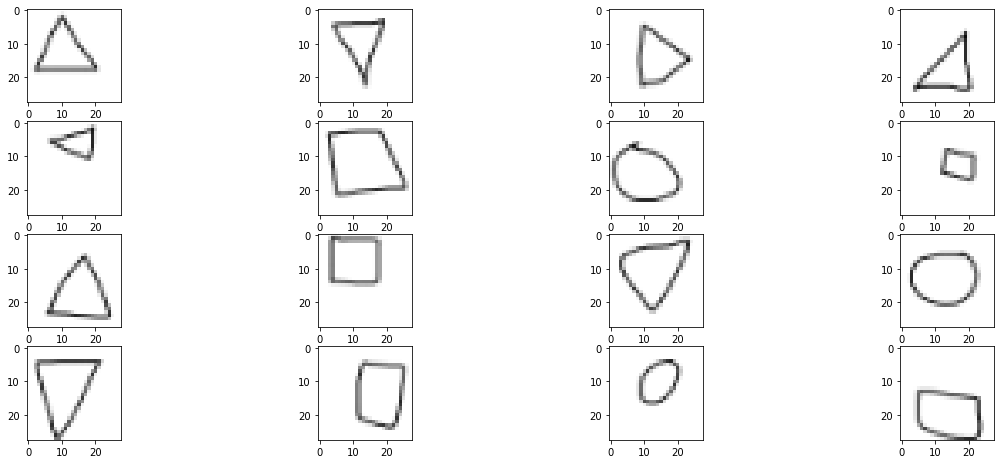

In [4]:
x,y = training_set.next()  
plt.figure(figsize=(20,10))
columns = 4
batch_size = 16
for i in range(0,batch_size):
    image = x[i]
    fil = int((batch_size / columns )+1)
    col = int(i +1)
    plt.subplot(fil, columns, col)
#    plt.subplot(16/ columns + 1, columns, i + 1)
    plt.imshow(image)

### Network definition using sequential model

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape = (28, 28, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5)) # antes era 0.25

# layer 2
model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5)) # antes era 0.25

# layer 3
model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5)) # antes era 0.25

model.add(Flatten())

# MLP at the end - classifier
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units = 3, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                        

In [7]:
model.compile(optimizer = 'rmsprop',
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

In [8]:
checkpoint = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)

In [9]:
history = model.fit(training_set, steps_per_epoch = 10,
                                   epochs = 100,
                                   callbacks=[checkpoint],
                                   validation_data = validation_set)

Epoch 1/100
10/10 [==============================] - 1s 50ms/step - loss: 1.1357 - accuracy: 0.3375 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 2/100
10/10 [==============================] - 0s 21ms/step - loss: 1.0959 - accuracy: 0.3625 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 3/100
10/10 [==============================] - 0s 22ms/step - loss: 1.1016 - accuracy: 0.3750 - val_loss: 1.0985 - val_accuracy: 0.3000
Epoch 4/100
10/10 [==============================] - 0s 21ms/step - loss: 1.1032 - accuracy: 0.3125 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 5/100
10/10 [==============================] - 0s 21ms/step - loss: 1.1008 - accuracy: 0.3250 - val_loss: 1.0999 - val_accuracy: 0.3333
Epoch 6/100
10/10 [==============================] - 0s 21ms/step - loss: 1.1043 - accuracy: 0.2875 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/100
10/10 [==============================] - 0s 22ms/step - loss: 1.1011 - accuracy: 0.3438 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 

10/10 [==============================] - 0s 22ms/step - loss: 0.5773 - accuracy: 0.7437 - val_loss: 0.4312 - val_accuracy: 0.8833
Epoch 29/100
10/10 [==============================] - 0s 21ms/step - loss: 0.5656 - accuracy: 0.7312 - val_loss: 0.4560 - val_accuracy: 0.8167
Epoch 30/100
10/10 [==============================] - 0s 23ms/step - loss: 0.6179 - accuracy: 0.7563 - val_loss: 0.4537 - val_accuracy: 0.8333
Epoch 31/100
10/10 [==============================] - 0s 22ms/step - loss: 0.5087 - accuracy: 0.7750 - val_loss: 0.4422 - val_accuracy: 0.8000
Epoch 32/100
10/10 [==============================] - 0s 22ms/step - loss: 0.4816 - accuracy: 0.7563 - val_loss: 0.5724 - val_accuracy: 0.7833
Epoch 33/100
10/10 [==============================] - 0s 22ms/step - loss: 0.5060 - accuracy: 0.7750 - val_loss: 0.8509 - val_accuracy: 0.6667
Epoch 34/100
10/10 [==============================] - 0s 22ms/step - loss: 0.5241 - accuracy: 0.7563 - val_loss: 0.7426 - val_accuracy: 0.7000
Epoch 35/100

10/10 [==============================] - 0s 21ms/step - loss: 0.2418 - accuracy: 0.9250 - val_loss: 0.2553 - val_accuracy: 0.8833
Epoch 56/100
10/10 [==============================] - 0s 21ms/step - loss: 0.2400 - accuracy: 0.9125 - val_loss: 0.3328 - val_accuracy: 0.8667
Epoch 57/100
10/10 [==============================] - 0s 21ms/step - loss: 0.1620 - accuracy: 0.9375 - val_loss: 0.2323 - val_accuracy: 0.9000
Epoch 58/100
10/10 [==============================] - 0s 22ms/step - loss: 0.1914 - accuracy: 0.9250 - val_loss: 0.2220 - val_accuracy: 0.9167
Epoch 59/100
10/10 [==============================] - 0s 21ms/step - loss: 0.2069 - accuracy: 0.9312 - val_loss: 0.2148 - val_accuracy: 0.9000
Epoch 60/100
10/10 [==============================] - 0s 22ms/step - loss: 0.3164 - accuracy: 0.9375 - val_loss: 0.2365 - val_accuracy: 0.9167
Epoch 61/100
10/10 [==============================] - 0s 21ms/step - loss: 0.2122 - accuracy: 0.9187 - val_loss: 0.1839 - val_accuracy: 0.9167
Epoch 62/100

10/10 [==============================] - 0s 31ms/step - loss: 0.2003 - accuracy: 0.9563 - val_loss: 0.1641 - val_accuracy: 0.9667
Epoch 83/100
10/10 [==============================] - 0s 29ms/step - loss: 0.1178 - accuracy: 0.9625 - val_loss: 0.2529 - val_accuracy: 0.9667
Epoch 84/100
10/10 [==============================] - 0s 28ms/step - loss: 0.1854 - accuracy: 0.9500 - val_loss: 0.1519 - val_accuracy: 0.9500
Epoch 85/100
10/10 [==============================] - 0s 29ms/step - loss: 0.1022 - accuracy: 0.9563 - val_loss: 0.1454 - val_accuracy: 0.9333
Epoch 86/100
10/10 [==============================] - 0s 29ms/step - loss: 0.0884 - accuracy: 0.9875 - val_loss: 0.1148 - val_accuracy: 0.9500
Epoch 87/100
10/10 [==============================] - 0s 29ms/step - loss: 0.0733 - accuracy: 0.9750 - val_loss: 0.1666 - val_accuracy: 0.9167
Epoch 88/100
10/10 [==============================] - 0s 31ms/step - loss: 0.1316 - accuracy: 0.9688 - val_loss: 0.1407 - val_accuracy: 0.9500
Epoch 89/100

In [10]:
model.save('shapes_cnn.h5')

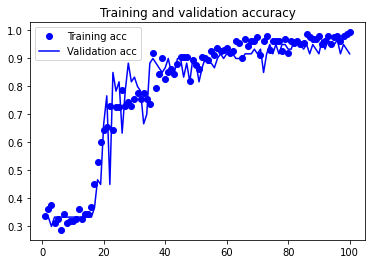

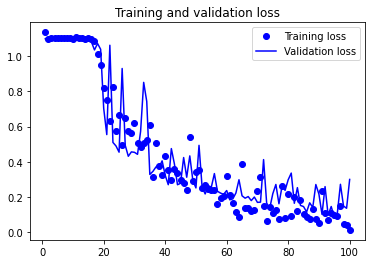

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
layer_outputs = [layer.output for layer in model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

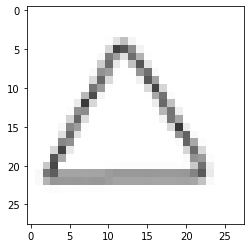

(1, 28, 28, 3)


In [20]:
img_path = 'data/triangles/drawing(2).png'

img = image.load_img(img_path, target_size=(28, 28))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

print(img_tensor.shape)

In [21]:
# Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor) 

In [22]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 28, 28, 32)


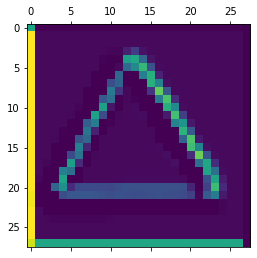

In [23]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

/tmp/ipykernel_11903/3613002630.py:18: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


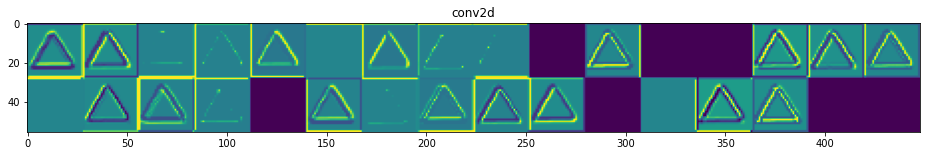

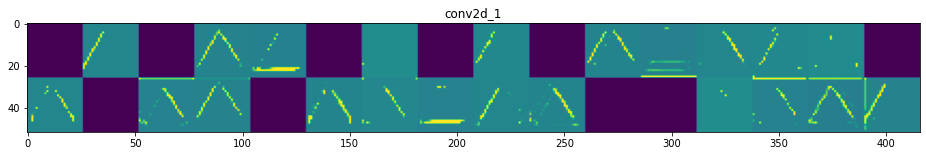

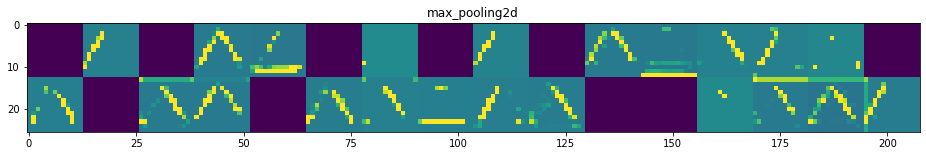

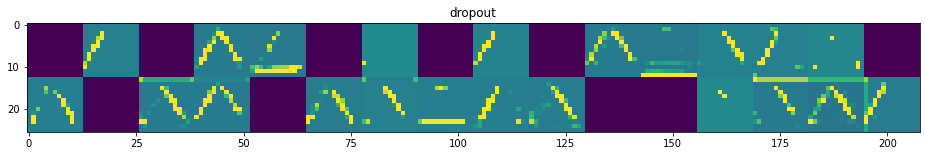

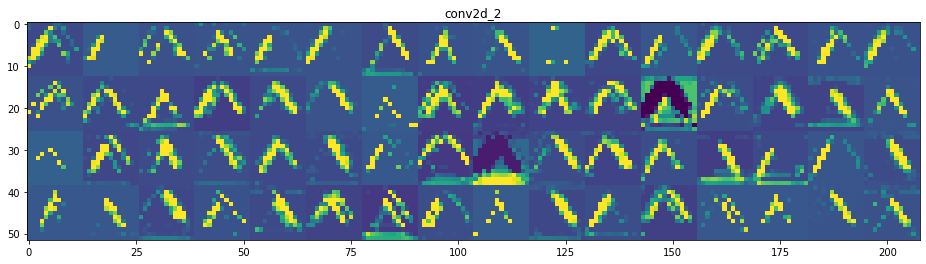

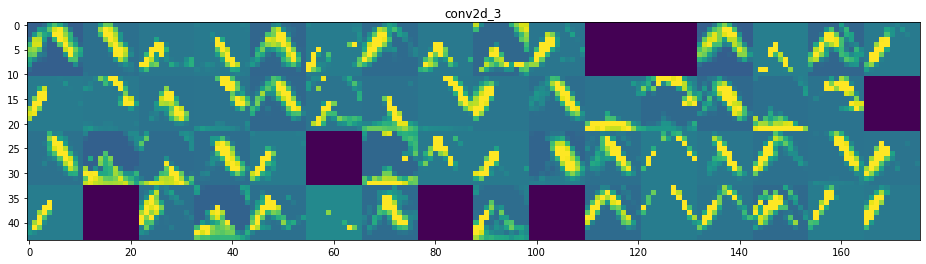

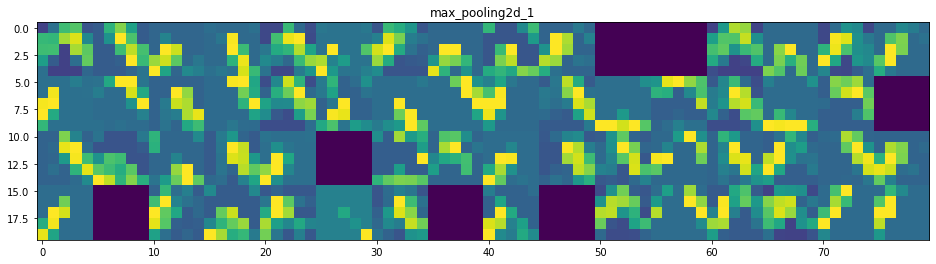

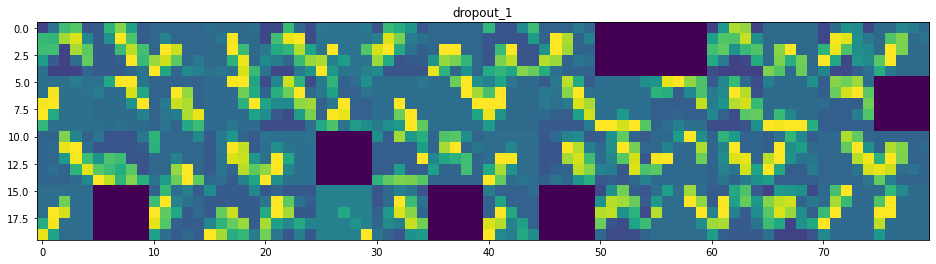

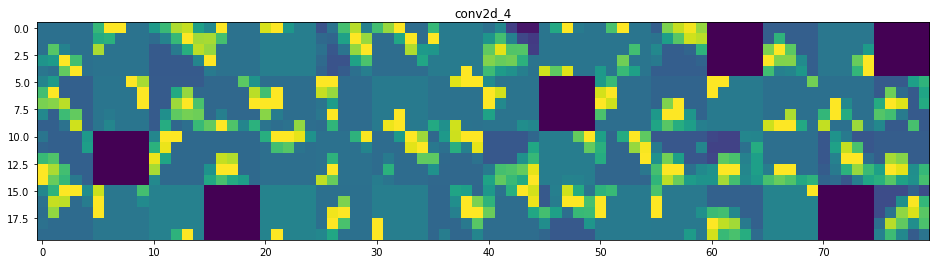

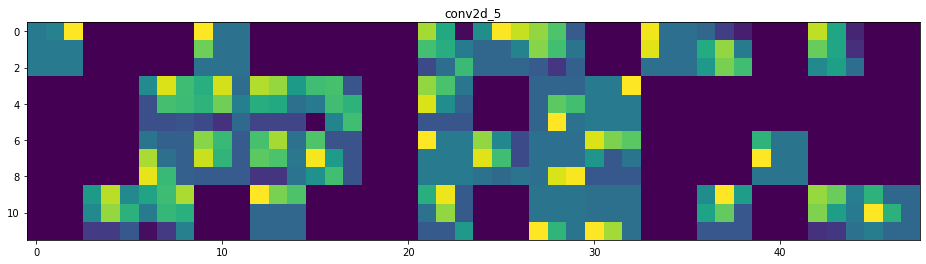

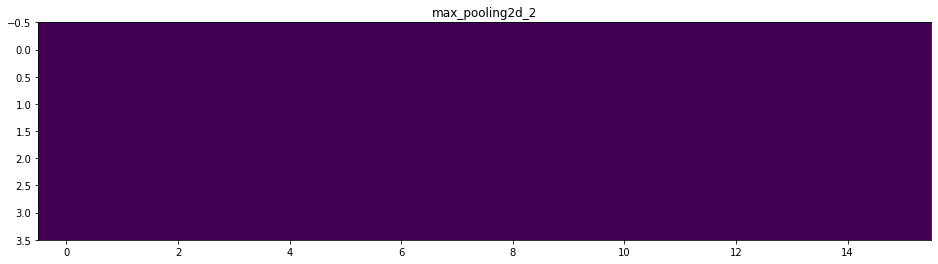

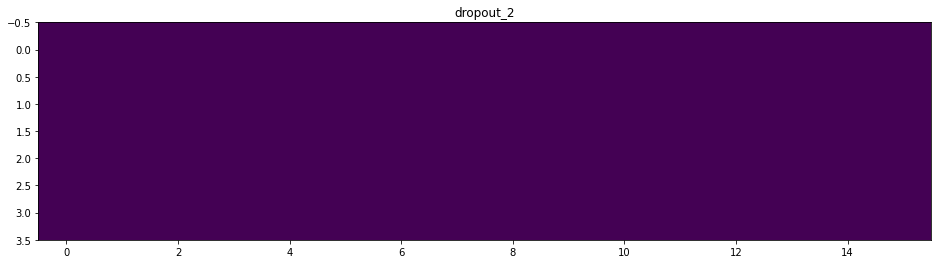

In [25]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')